In [1]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

from colorama import Fore

In [2]:
x = sp.symbols('x')

In [3]:
def maclaurin(f, n):
    sign = -1
    if f == 'cos':
        n = (int)(n / 2)
        T = sp.Poly(1, x) # inicijalizujemo na T = 1
        for k in range(1, n+1):
            T = T.add(sp.Poly(sign**k * x**(2*k) / math.factorial((2*k))))
            
    elif f == 'sin':
        n = (int)((n - 1) / 2)
        T = sp.Poly(x, x) # inicijalizujemo na T = x
        for k in range(1, n+1):
            T = T.add(sp.Poly(sign**k * x**(2*k+1) / math.factorial((2*k+1))))
    
    return T

In [4]:
def ima_nule(P):
    # pravljenje sturmovog niza
    Pdiff = sp.diff(P, x)
    Q = sp.gcd(P, Pdiff)
    P0 = sp.div(P, Q)[0]
    P1 = sp.diff(P0, x)
    p_arr = []
    p_arr.append(P0)
    p_arr.append(P1)
    while sp.degree(P0) != 1:
        p_i = -sp.rem(P0, P1)
        P0 = P1
        P1 = p_i    
        p_arr.append(p_i)
        
    # odredjujemo broj nula na intervalu [a, b]
    a = 0.001
    b = np.pi / 2
    Va = 0
    Vb = 0
    a_last_sign = -1
    b_last_sign = -1
    for p in p_arr:
        if sp.degree(p) != 0:
            pp = sp.Poly(p)
            p_a = pp.subs(x, a)
            p_b = pp.subs(x, b)
        else:
            p_a = p.as_expr()
            p_b = p.as_expr()
            
        if p_a > 0: 
            if a_last_sign == -1:
                a_last_sign = 1
            elif a_last_sign == 0: #poslednje je bio negativan broj
                Va = Va + 1 #doslo je do promene
                a_last_sign = 1 #azuriramo znak
        elif p_a < 0:
            if a_last_sign == -1:
                a_last_sign = 0
            elif a_last_sign == 1: #poslednje je bio negativan broj
                Va = Va + 1 #doslo je do promene
                a_last_sign = 0 #azuriramo znak

        if p_b > 0: 
            if b_last_sign == -1:
                b_last_sign = 1
            elif b_last_sign == 0: #poslednje je bio negativan broj
                Vb = Vb + 1 #doslo je do promene
                b_last_sign = 1 #azuriramo znak
        elif p_b < 0:
            if b_last_sign == -1:
                b_last_sign = 0
            elif b_last_sign == 1: #poslednje je bio negativan broj
                Vb = Vb + 1 #doslo je do promene
                b_last_sign = 0 #azuriramo znak
    
             
    N = Va - Vb
    print("Broj nula: N = " + str(N))
    if N > 0:
        return True
    else:
        return False

alfa uz cos, beta uz sin

def find_alfa(f): #uz cos
    ??

def find_beta(f):
    ??

In [5]:
def ispitaj(f, k1, k2):
    alfa = find_alfa(f)
    beta = find_beta(f)
    
    if alfa > 0: # pozitivno je -> gledamo od cega je cos veci
        cos_index = 4 * k1 + 2
    elif alfa < 0: # negativno je -> gledamo od cega je cos manji
        cos_index = 4 * k1 
    
    if beta > 0: # pozitivno je -> gledamo od cega je sin veci
        sin_index = 4 * k2 + 3
    elif beta < 0: # negativno je -> gledamo od cega je sin manji
        sin_index = 4 * k2 + 1
        
    p = f.subs(sp.cos(x), maclaurin("cos", cos_index).as_expr())
    p = p.subs(sp.sin(x), maclaurin("sin", sin_index).as_expr())      
    
    
    if ima_nule(p):
        # AKO FUNKCIJA IMA NULE NA DATOM SEGMENTU - NE DOKAZUJE POZITIVNOST
        print("[NOT OK] P[" + str(k1) + "," + str(k2) 
              + "](x) ne dokazuje pozitivnost MTP funkcije nad (0, Pi/2) jer ima nule na tom segmentu")
    else:
        # AKO FUNKCIJA NEMA NULE - ODREDJUJEMO ZNAK FUNKCIJE
        fSign= sp.Poly(p).subs(x, 1)
        if fSign < 0:# AKO JE NEGATIVNA - NE DOKAZUJE POZITIVNOST
            print("[NOT OK] P[" + str(k1) + "," + str(k2) 
              + "](x) ne dokazuje pozitivnost MTP funkcije nad (0, Pi/2) jer je negativna na zadatom domenu")
        else: # AKO JE POZITIVNA - DOKAZUJE POZITIVNOST
            print("[OK] P[" + str(k1) + "," + str(k2) 
              + "](x) dokazuje pozitivnost MTP funkcije nad (0, Pi/2).")
    
    return p

## Primer 1

In [ ]:
def find_alfa(f): #uz cos
    return -1

def find_beta(f): # uz sin
    return 1

f = x**3 * sp.sin(x) - x * sp.cos(x)**3 + x - 3/2 * x**3 + 3/32 * x**4

## Primer 2

In [20]:
def find_alfa(f): # uz cos
    return -1

def find_beta(f): # uz sin
    return -1

f = -4/6*x**3*sp.sin(x) - 3*x**2 * sp.cos(x)/20 + x**5 + 8/98*x**2 + 1

## Primer 3

In [30]:
def find_alfa(f): # uz cos
    return -1

def find_beta(f): # uz sin
    return 1

f = x**3 * sp.sin(x) - x/5 * sp.cos(x)**3 +x*6/9 - 6/5*x**3 + 9/59*x**2

## Primer 4

In [33]:
def find_alfa(f): #uz cos
    return -1

def find_beta(f): # uz sin
    return 1

f = x**6 * sp.sin(x) - x/5 * sp.cos(x)**3 - 6/5* x**3 + 5/9 - x**4 + 1

# GLAVNI PROGRAM

Broj nula: N = 2
[NOT OK] P[0,0](x) ne dokazuje pozitivnost MTP funkcije nad (0, Pi/2) jer ima nule na tom segmentu
Broj nula: N = 2
[NOT OK] P[0,1](x) ne dokazuje pozitivnost MTP funkcije nad (0, Pi/2) jer ima nule na tom segmentu
Broj nula: N = 0
[OK] P[1,0](x) dokazuje pozitivnost MTP funkcije nad (0, Pi/2).
Broj nula: N = 0
[OK] P[1,1](x) dokazuje pozitivnost MTP funkcije nad (0, Pi/2).


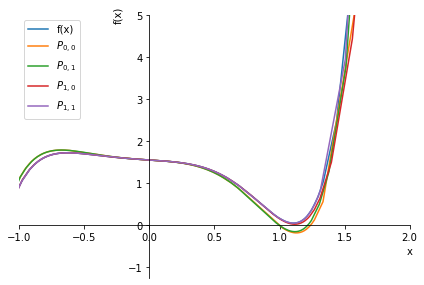

In [34]:
p1 = ispitaj(f, 0, 0)
p2 = ispitaj(f, 0, 1)
p3 = ispitaj(f, 1, 0)
p4 = ispitaj(f, 1, 1)

graf0 = sp.plot(f, xlim=[-1, 2], ylim=[-1.25, 5], show=False, label="f(x)")
graf1 = sp.plot(p1.as_expr(), xlim=[-1, 2], ylim=[-1.25, 5], show=False, label="$P_{0,0}$")
graf2 = sp.plot(p2.as_expr(), xlim=[-1, 2], ylim=[-1.25, 5], show=False, label="$P_{0,1}$")
graf3 = sp.plot(p3.as_expr(), xlim=[-1, 2], ylim=[-1.25, 5], show=False, label="$P_{1,0}$")
graf4 = sp.plot(p4.as_expr(), xlim=[-1, 2], ylim=[-1.25, 5], show=False, label="$P_{1,1}$")

graf0.append(graf1[0])
graf0.append(graf2[0])
graf0.append(graf3[0])
graf0.append(graf4[0])

graf0.legend = True

graf0.show()